The purpose of this notebook is to extract correlation values form the himalaya pipeline.
Using the Glasser ROIs

In [1]:
import os, glob
from os.path import join
import numpy as np
import pandas as pd
import seaborn as sns

from neuromaps.datasets import fetch_fslr
import numpy as np
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
from neuromaps.datasets import fetch_fslr
from surfplot import Plot

import matplotlib.pyplot as plt

In [2]:
rois = {
    "V1": [1],             # Primary Visual
    "FFC": [18],           # Fusiform   
    "PHG": [126,155,127],  # ParaHippocampal Gyrus   
    #"MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
    "LOC": [140,141,157,156,159,2,23],
    "pSTS": [28,139],       # posterior superior temporal sulcus
    "PPC": [13, 19, 16, 17], # posterior parietal (V3A, V7, IPS1)
    "TPJ": [149,150,151],  # Area TemporoParietoOccipital	Junction 1, 2, 3
    "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
    "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
    "vPM": [78,80],       # ventral Premotor6r, IFJP, 43, 6v
   
        }

In [3]:
def plot_roi(roi_name, lh_labels, rh_labels, rois, surfaces):
    # roi_name = "TPJ"
    lh, rh = surfaces
    p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
    # fig = p.build()
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
    # plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
    p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
    fig = p.build()
    fig.show()

## parameters

In [4]:
main_dir = '/Volumes/life-encoding'
subjects = ['sub-rid000001', 'sub-rid000005', 'sub-rid000006',
            'sub-rid000009', 'sub-rid000012', 'sub-rid000014',
            'sub-rid000017', 'sub-rid000019', 'sub-rid000024',
            'sub-rid000027', 'sub-rid000031', 'sub-rid000032',
            'sub-rid000033', 'sub-rid000034', 'sub-rid000036',
            'sub-rid000037', 'sub-rid000038', 'sub-rid000041']
runs = [1,2,3,4]
hemis = ['lh', 'rh']
features = ['bg', 'agents', 'actions', 'moten']
encoding_dir = join(main_dir, 'results/himalaya/0tr/ha_common_pca-40')
isc_dir = join(main_dir, 'scripts/isc/lowerbound')

load an example dataset and check shape of data

In [5]:
feature = 'bg'; sub= 'sub-rid000001'; run = 1; hemi = 'lh'; roi_name = 'PPC'
fname_pattern = f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
data = np.load(join(encoding_dir, fname_pattern))

In [6]:
data.shape

(1, 40962)

## load MMP1

In [7]:
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

## compile results (correlation)
compiled per roi, subject, hemisphere, 4 features, and 4 runs

In [8]:
results = {
    "encoding performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    "features": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            for feature in features:
                for roi_name in rois:
                    fname_pattern = f'{feature}-r_pca-40_align-ha_common_{subject}_run-{run}_hemi-{hemi}.npy'
                    data = np.load(join(encoding_dir, fname_pattern))
                    if hemi == 'lh':
                        labels = lh_labels
                    elif hemi == 'rh':
                        labels = rh_labels
                    roi_map = np.full(labels.shape, False)
                    roi_map[np.in1d(labels, rois[roi_name])] = True

                    results['encoding performance (r)'].append(np.mean(data[0, roi_map])) 
                    results['ROI'].append(roi_name)
                    results['subject'].append(subject)
                    results['hemisphere'].append(hemi)
                    results['features'].append(feature)
                    results['run'].append(str(run))
            print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 1
finished loading results for sub-rid000001, lh, 2
finished loading results for sub-rid000001, lh, 3
finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 1
finished loading results for sub-rid000001, rh, 2
finished loading results for sub-rid000001, rh, 3
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 1
finished loading results for sub-rid000005, lh, 2
finished loading results for sub-rid000005, lh, 3
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 1
finished loading results for sub-rid000005, rh, 2
finished loading results for sub-rid000005, rh, 3
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 1
finished loading results for sub-rid000006, lh, 2
finished loading results for sub-rid000006, lh, 3
finished loading results for sub-rid000006, lh, 4


In [9]:
results_df = pd.DataFrame(results)
results_df.head()

,encoding performance (r),ROI,subject,hemisphere,features,run
0,0.015426,V1,sub-rid000001,lh,bg,1
1,0.109617,FFC,sub-rid000001,lh,bg,1
2,0.038564,PHG,sub-rid000001,lh,bg,1
3,0.086455,LOC,sub-rid000001,lh,bg,1
4,0.013616,pSTS,sub-rid000001,lh,bg,1


In [10]:
np.unique(results_df.ROI)

array(['AIP', 'FFC', 'LOC', 'PHG', 'PPC', 'SM', 'TPJ', 'V1', 'pSTS',
       'vPM'], dtype=object)

In [11]:
results_df[results_df['features'] == 'actions']

,encoding performance (r),ROI,subject,hemisphere,features,run
20,0.004620,V1,sub-rid000001,lh,actions,1
21,-0.014186,FFC,sub-rid000001,lh,actions,1
22,-0.015928,PHG,sub-rid000001,lh,actions,1
23,0.051509,LOC,sub-rid000001,lh,actions,1
24,0.023521,pSTS,sub-rid000001,lh,actions,1
...,...,...,...,...,...,...
5745,-0.020496,PPC,sub-rid000041,rh,actions,4
5746,0.042417,TPJ,sub-rid000041,rh,actions,4
5747,0.038795,AIP,sub-rid000041,rh,actions,4
5748,0.018398,SM,sub-rid000041,rh,actions,4


# visualization

In [12]:
roi_order = ["V1", "LOC", "FFC", "PHG", "pSTS", "TPJ", "PPC", "AIP", "vPM", "SM"]

### barplot: actions

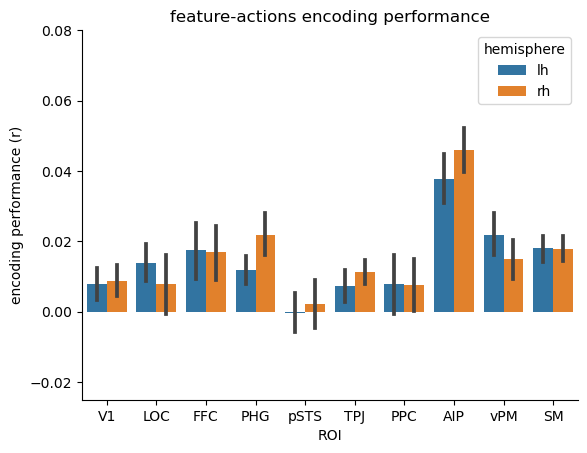

In [22]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              order=roi_order
            )
plt.ylim(-0.025, 0.08)
plt.title("feature-actions encoding performance")
sns.despine()

### barplot: bg

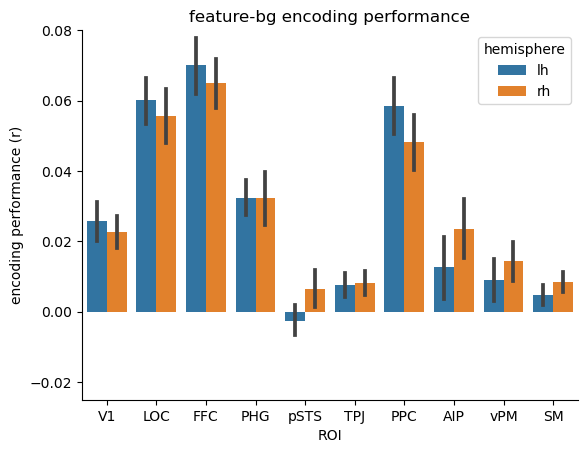

In [23]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'bg'],
              order=roi_order
            )
plt.ylim(-0.025, 0.08)
plt.title("feature-bg encoding performance")
sns.despine()

### barplot: agents

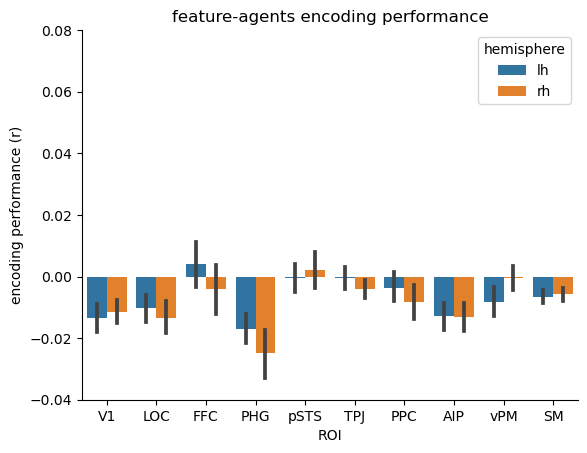

In [24]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'agents'], 
              order=roi_order
            )
plt.ylim(-0.04, 0.08)
plt.title("feature-agents encoding performance")
sns.despine()

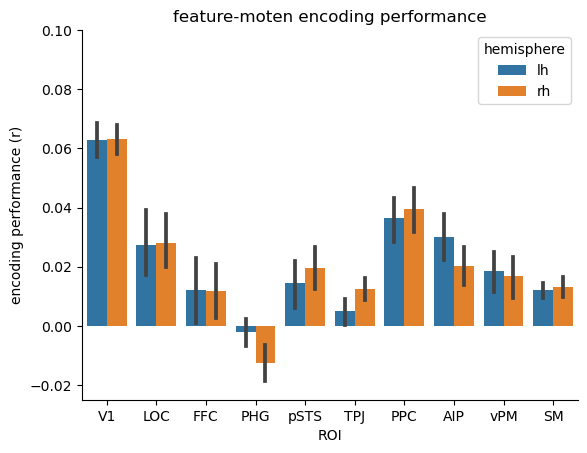

In [25]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'moten'],
              order=roi_order,
            )
plt.ylim(-0.025, 0.1)
plt.title("feature-moten encoding performance")
sns.despine()

### barplot

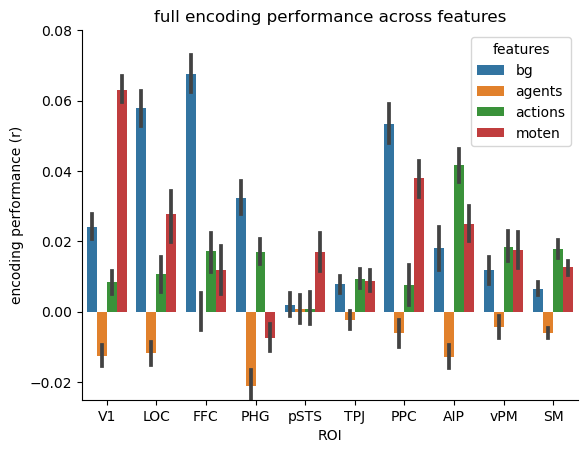

In [27]:
#hue = features
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="features",
              data=results_df, 
              order=roi_order
            )
plt.ylim(-0.025, 0.08)
plt.title("full encoding performance across features")
sns.despine()

# compile results (ISC)
here, we plot the upper/lower bound of ISC

In [30]:
isc = {
    "ISC lowerbound performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    # "features": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            # for feature in features:
            for roi_name in rois:
                fname_pattern = f'subjectwise-ISC_align-ha_common_hemi-{hemi}_run-{run:02d}_{subject}.npy'#f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
                data = np.load(join(isc_dir, fname_pattern))
                if hemi == 'lh':
                    labels = lh_labels
                elif hemi == 'rh':
                    labels = rh_labels
                roi_map = np.full(labels.shape, False)
                roi_map[np.in1d(labels, rois[roi_name])] = True

                isc['ISC lowerbound performance (r)'].append(np.mean(data[0, roi_map])) 
                isc['ROI'].append(roi_name)
                isc['subject'].append(subject)
                isc['hemisphere'].append(hemi)
                # isc['features'].append(feature)
                isc['run'].append(str(run))
        print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 4
finished loading results for sub-rid000006, rh, 4
finished loading results for sub-rid000009, lh, 4
finished loading results for sub-rid000009, rh, 4
finished loading results for sub-rid000012, lh, 4
finished loading results for sub-rid000012, rh, 4
finished loading results for sub-rid000014, lh, 4
finished loading results for sub-rid000014, rh, 4
finished loading results for sub-rid000017, lh, 4
finished loading results for sub-rid000017, rh, 4
finished loading results for sub-rid000019, lh, 4
finished loading results for sub-rid000019, rh, 4
finished loading results for sub-rid000024, lh, 4
finished loading results for sub-rid000024, rh, 4
finished loading results for sub-rid000027, lh, 4
finished loading results for sub-rid000027, rh, 4


In [31]:
isc_df = pd.DataFrame(isc)
isc_df

,ISC lowerbound performance (r),ROI,subject,hemisphere,run
0,0.555601,V1,sub-rid000001,lh,1
1,0.567080,FFC,sub-rid000001,lh,1
2,0.365155,PHG,sub-rid000001,lh,1
3,0.585407,LOC,sub-rid000001,lh,1
4,0.600767,pSTS,sub-rid000001,lh,1
...,...,...,...,...,...
1435,0.435059,PPC,sub-rid000041,rh,4
1436,0.317024,TPJ,sub-rid000041,rh,4
1437,0.301091,AIP,sub-rid000041,rh,4
1438,0.173826,SM,sub-rid000041,rh,4


## ISC lowerbound

[Text(0.5, 1.0, 'ISC lowerbound')]

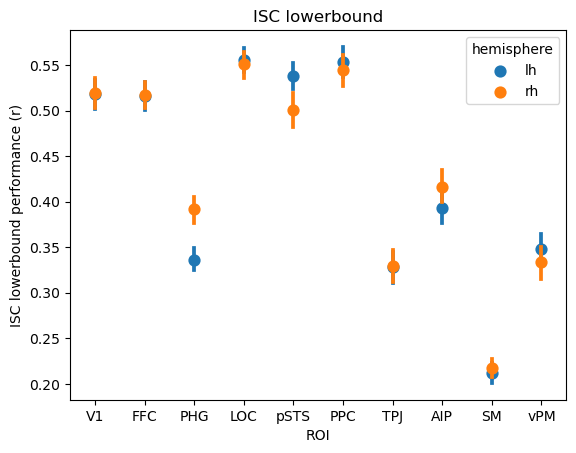

In [32]:
sns.pointplot(x="ROI", 
              y="ISC lowerbound performance (r)", 
              hue="hemisphere",
              data=isc_df,
              join=False).set(title='ISC lowerbound')

[Text(0.5, 1.0, 'ISC lowerbound')]

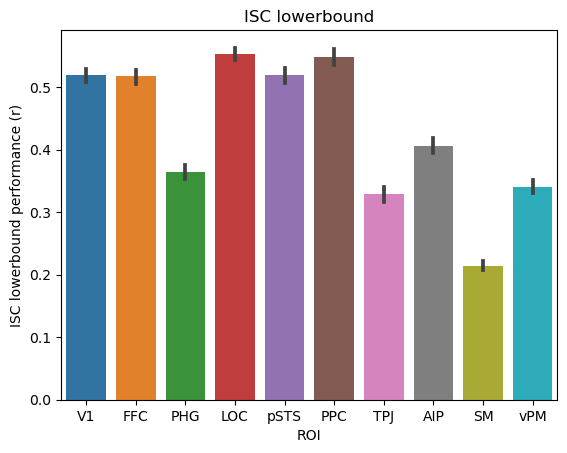

In [26]:
#hue = features
sns.barplot(x="ROI", 
              y="ISC lowerbound performance (r)", 
              # hue="features",
              data=isc_df
            ).set(title='ISC lowerbound')

# compile ISC upperbound

In [33]:
isc_upperdir = join(main_dir, 'scripts/isc/upperbound')

In [34]:
isc_upper = {
    "ISC upperbound performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            # for feature in features:
            for roi_name in rois:
                fname_pattern = f'subjectwise-ISCupperbound_align-ha_common_hemi-{hemi}_run-{run:02d}_{subject}.npy'#f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
                data = np.load(join(isc_upperdir, fname_pattern))
                if hemi == 'lh':
                    labels = lh_labels
                elif hemi == 'rh':
                    labels = rh_labels
                roi_map = np.full(labels.shape, False)
                roi_map[np.in1d(labels, rois[roi_name])] = True

                isc_upper['ISC upperbound performance (r)'].append(np.mean(data[0, roi_map])) 
                isc_upper['ROI'].append(roi_name)
                isc_upper['subject'].append(subject)
                isc_upper['hemisphere'].append(hemi)
                isc_upper['run'].append(str(run))
        print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 4
finished loading results for sub-rid000006, rh, 4
finished loading results for sub-rid000009, lh, 4
finished loading results for sub-rid000009, rh, 4
finished loading results for sub-rid000012, lh, 4
finished loading results for sub-rid000012, rh, 4
finished loading results for sub-rid000014, lh, 4
finished loading results for sub-rid000014, rh, 4
finished loading results for sub-rid000017, lh, 4
finished loading results for sub-rid000017, rh, 4
finished loading results for sub-rid000019, lh, 4
finished loading results for sub-rid000019, rh, 4
finished loading results for sub-rid000024, lh, 4
finished loading results for sub-rid000024, rh, 4
finished loading results for sub-rid000027, lh, 4
finished loading results for sub-rid000027, rh, 4


[Text(0.5, 1.0, 'ISC upperbound')]

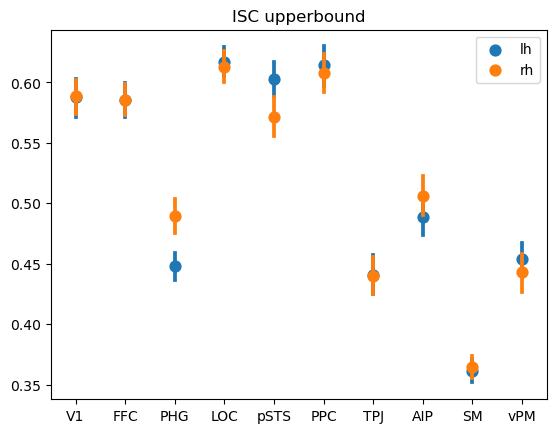

In [35]:
sns.pointplot(x="ROI", 
              y="ISC upperbound performance (r)", 
              hue="hemisphere",
              data=isc_upper,
              join=False).set(title='ISC upperbound')

[Text(0.5, 1.0, 'ISC upperbound')]

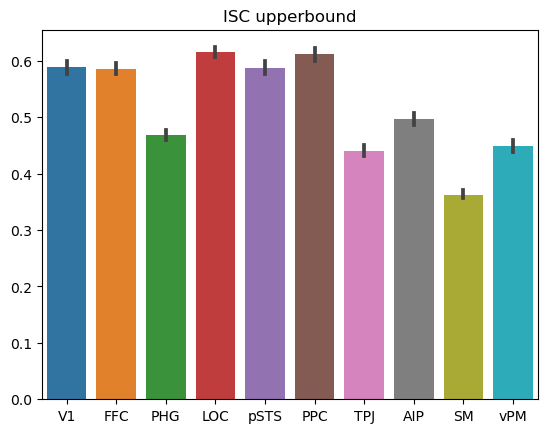

In [36]:
#hue = features
sns.barplot(x="ROI", 
              y="ISC upperbound performance (r)", 
              # hue="features",
              data=isc_upper
            ).set(title='ISC upperbound')